In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
from tqdm import tqdm



In [2]:
property_names = []
property_links = []
city_name = []
no_beds = []
no_baths = []
home_sqft = []
LotSize = []
HasBackyard = []
HasGarage = []
NewConstruction = []
Stories = []
Age = []
AskingPrice = []
SoldPrice = []
PriceDifference = []
DaysMarket = []
PropertyType = []
Condition = []
Parking_Spaces = []
Central_Air = []
Tax_Value = []

In [3]:
url = 'https://www.compass.com/recently-sold/dc/'
response = requests.get(url)
response.status_code

200

In [4]:
def get_property_names_links(link_pages):

    pages = []
    for i in range(link_pages):
        pages.append(i)
    
    for page in pages:
        #Create full url to scrape

        base_url = 'https://www.compass.com/recently-sold/dc/'
        link = '?page='
        page = str(page)

        
        url = base_url + link + page
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page,"lxml")

        #Get property name
        for element in soup.find_all(class_='uc-listingCard-title'):
            property_name = element.text.strip()
            property_names.append(property_name)
        
        #Get property links
        for element in soup.find_all('a', {'class': 'uc-listingCard-title'}):
            property_link = element['href']
            property_links.append(property_link)    
        #Get info from property link
            property_link = property_link.split('/')
            property_link = property_link[2]
            property_link = property_link.split('-')
            property_link = property_link[-3:-1]
            city = ' '.join(property_link)
            city_name.append(city)

        #Get Beds
        for element in soup.find_all(class_='uc-listingCard-subStat uc-listingCard-subStat--beds'):
            beds = element.text.strip()
            if beds == "Studio":
                beds = 0.5
            else:
                beds = beds.replace(' BD','')
            no_beds.append(beds)
            
        #Get Bathrooms
        for element in soup.find_all(class_='uc-listingCard-subStat uc-listingCard-subStat--baths'):
            baths = element.text.strip()
            baths = baths.replace(' BA','')
            no_baths.append(baths)
        
        #Get SQFT
        for element in soup.find_all(class_='uc-listingCard-subStat uc-listingCard-subStat--sqFt'):
            sqft = element.text.strip()
            sqft = sqft.replace(' SF','')
            home_sqft.append(sqft)

In [5]:
tqdm(get_property_names_links(60))

0it [00:00, ?it/s]

In [6]:
names_links_df = pd.DataFrame(list(zip(property_names, property_links, city_name, no_beds, no_baths, home_sqft)),
               columns =['Name', 'link', 'city', 'Beds', 'Baths', 'SQFT'])

In [7]:
names_links_df

,Name,link,city,Beds,Baths,SQFT
0,161 Meeting House Drive,/listing/161-meeting-house-drive-winchester-va...,winchester va,4,2,"2,116"
1,431 Manor Place Northwest,/listing/431-manor-place-northwest-washington-...,washington dc,3,3.5,"1,860"
2,1247 Pine Hill Road,/listing/1247-pine-hill-road-mclean-va-22101/8...,mclean va,4,3.5,"2,420"
3,9508 Shantha Court,/listing/9508-shantha-court-laurel-md-20723/78...,laurel md,3,3.5,"3,455"
4,"1701 16th Street Northwest, Unit 350",/listing/1701-16th-street-northwest-unit-350-w...,washington dc,1,1,667
...,...,...,...,...,...,...
2938,"3210 North Leisure World Boulevard, Unit 604",/listing/3210-north-leisure-world-boulevard-un...,spring md,2,2,569
2939,"1767 Lanier Place Northwest, Unit 9",/listing/1767-lanier-place-northwest-unit-9-wa...,washington dc,1,1,871
2940,"1325 13th Street Northwest, Unit 29",/listing/1325-13th-street-northwest-unit-29-wa...,washington dc,1,1,"1,314"
2941,"501 Hungerford Drive, Unit 372",/listing/501-hungerford-drive-unit-372-rockvil...,rockville md,1,2,"1,040"


In [8]:
def populate_table(link):
    
    base_url = 'https://www.compass.com'
    
    #Create full url to scrape
    url = base_url + link
    
    #Request HTML and parse
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page,"lxml")

    
    headers = ['Lot Size', 'Backyard', 
               'Garage', 'Asking Price', 'Sold Price', 
               'Price Difference', 'New Construction', 'Days on Market']

        #Get Property Type
    try:
        element = soup.find(text=re.compile('Compass Type'))
        property_ = element.findNext().text.strip()
        PropertyType.append(property_)
    except:
        PropertyType.append('failed here')
    
        
        #Get Lot Size
    try:
        element = soup.find(text=re.compile('Lot Size'))
        lot_size = element.findNext().text.strip()
        LotSize.append(lot_size)
    except:
        LotSize.append('failed here')

  
        #Get Garage
    try:
        garage = soup.find(text=re.compile('Garage')).findNext().text.strip()
        HasGarage.append(garage)
    except:
        HasGarage.append('failed here')

   
        #Get New Construction
    try:
        string = soup.find(text=re.compile('New Construction: '))
        new_construction = string.findNext().text.strip()
        NewConstruction.append(new_construction)
    except:
        NewConstruction.append('failed here')

        #Get Stories
    try:
        string = soup.find(text=re.compile('Levels/Stories: '))
        i = string.findNext().text.strip()
        Stories.append(i)
    except:
        Stories.append('failed here')
    
    #Get Age
    try:
        string = soup.find(text=re.compile('Age: '))
        i = string.findNext().text.strip()
        Age.append(i)
    except:
        Age.append('failed here')
        
    #Get Property Condition
    try:
        string = soup.find(text=re.compile('Property Condition: '))
        i = string.findNext().text.strip()
        Condition.append(i)
    except:
        Condition.append('failed here')
        
    #Get Number of Assigned Spaces
    try:
        string = soup.find(text=re.compile('Number of Assigned Spaces: '))
        i = string.findNext().text.strip()
        Parking_Spaces.append(i)
    except:
        Parking_Spaces.append('failed here')
        
    #Get Central Air
    try:
        string = soup.find(text=re.compile('Central Air: '))
        i = string.findNext().text.strip()
        Central_Air.append(i)
    except:
        Central_Air.append('failed here')
        
    #Get Tax Value
    try:
        string = soup.find(text=re.compile('Tax Assessed Value: '))
        i = string.findNext().text.strip()
        Tax_Value.append(i)
    except:
        Tax_Value.append('failed here')
        
        #Get Days on Market
    try:
        string = soup.find(text=re.compile('Days on Market'))
        days_on_market = string.findNext().text.strip()
        DaysMarket.append(days_on_market)
    except:
        DaysMarket.append('failed here')
        
        #Get Asking Price
    try:
        scripts = soup.find_all('script', text=re.compile('preValue'))
        scripts_str = str(scripts).split(',')
        list_price = [i for i in scripts_str if "listed" in i]
        price = list_price[0]
        asking_price = price[9:]
        AskingPrice.append(asking_price)
    except:
        AskingPrice.append('failed here')
        
        
        
        #Get Sold Price
    try:
        table = soup.find_all('table', class_='data-table__TableStyled-ibnf7p-0 bhHpMT')[1]
        rows = [row for row in table.find_all('tr')]  # tr tag is for rows
        soldprice = rows[1].find_all('td')[1].text.strip()
        SoldPrice.append(soldprice)
    except:
        SoldPrice.append('failed here')
 
      
   

In [9]:
for link in tqdm(names_links_df.link):
    populate_table(link)


 10%|█         | 303/2943 [03:26<30:23,  1.45it/s]


 21%|██        | 605/2943 [06:53<22:46,  1.71it/s]


 31%|███       | 907/2943 [10:22<20:37,  1.65it/s]


 41%|████      | 1205/2943 [13:36<22:53,  1.27it/s]


 51%|█████     | 1501/2943 [16:56<16:34,  1.45it/s]


 61%|██████    | 1797/2943 [20:26<15:06,  1.26it/s]


 71%|███████   | 2093/2943 [23:49<09:34,  1.48it/s]


 81%|████████  | 2389/2943 [27:09<05:32,  1.66it/s]


 91%|█████████ | 2685/2943 [30:37<02:49,  1.53it/s]


100%|██████████| 2943/2943 [33:26<00:00,  1.47it/s]


In [53]:
names_links_df['Lot_Size'] = LotSize
names_links_df['Has_Garage'] = HasGarage
names_links_df['New_Construction'] = NewConstruction
names_links_df['Days_on_Market'] = DaysMarket
names_links_df['Property_Type'] = PropertyType
names_links_df['Asking_Price'] = AskingPrice
names_links_df['Sold_Price'] = SoldPrice
names_links_df['Difference_in_Price'] = ''
names_links_df['Stories'] = Stories
names_links_df['Age'] = Age
names_links_df['Condition'] = Condition
names_links_df['Parking_Spaces'] = Parking_Spaces
names_links_df['Central_Air'] = Central_Air
names_links_df['Tax_Value'] = Tax_Value

In [54]:
mask = names_links_df['Sold_Price'] != ""

In [55]:
names_links_cleaned1 = names_links_df[mask]
mask = names_links_cleaned1['Asking_Price'] != "failed here"
names_links_cleaned2 = names_links_cleaned1[mask]
mask = names_links_cleaned2['Sold_Price'] != ''
names_links_cleaned3 = names_links_cleaned2[mask]
names_links_cleaned3

,Name,link,city,Beds,Baths,SQFT,Lot_Size,Has_Garage,New_Construction,Days_on_Market,Property_Type,Asking_Price,Sold_Price,Difference_in_Price,Stories,Age,Condition,Parking_Spaces,Central_Air,Tax_Value
0,161 Meeting House Drive,/listing/161-meeting-house-drive-winchester-va...,winchester va,4,2,"2,116","2.90 AC / 126,324 SF",Yes,No,6,Single Family,449000,"$449,000",,2,1998,failed here,failed here,Yes,"$342,600"
1,431 Manor Place Northwest,/listing/431-manor-place-northwest-washington-...,washington dc,3,3.5,"1,860","0.05 AC / 2,000 SF",No,No,6,Townhouse,799000,"$863,000",,3,1907,Excellent,failed here,Yes,"$700,870"
2,1247 Pine Hill Road,/listing/1247-pine-hill-road-mclean-va-22101/8...,mclean va,4,3.5,"2,420","0.19 AC / 8,447 SF",No,No,5,Single Family,1199000,"$1,225,000",,3,1981,Excellent,failed here,Yes,"$936,660"
3,9508 Shantha Court,/listing/9508-shantha-court-laurel-md-20723/78...,laurel md,3,3.5,"3,455","0.16 AC / 6,889 SF",Yes,No,7,Single Family,565000,"$562,500",,3,1995,failed here,failed here,Yes,"$416,800"
5,"3800 Powell Lane, Unit 719",/listing/3800-powell-lane-unit-719-falls-churc...,church va,2,2.5,"1,557",failed here,No,No,12,Condo,405000,"$400,000",,1,1983,failed here,1,Yes,"$329,030"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938,"3210 North Leisure World Boulevard, Unit 604",/listing/3210-north-leisure-world-boulevard-un...,spring md,2,2,569,930 SqFt,Yes,No,22,Condo,325000,"$325,000",,1,2001,Very Good,1,Yes,"$301,667"
2939,"1767 Lanier Place Northwest, Unit 9",/listing/1767-lanier-place-northwest-unit-9-wa...,washington dc,1,1,871,487 SqFt,Yes,No,6,Condo,1189000,"$1,182,500",,1,2016,failed here,failed here,Yes,"$1,025,380"
2940,"1325 13th Street Northwest, Unit 29",/listing/1325-13th-street-northwest-unit-29-wa...,washington dc,1,1,"1,314",723 SqFt,No,No,4,Condo,849000,"$869,500",,2,1875,Excellent,failed here,Yes,"$733,320"
2941,"501 Hungerford Drive, Unit 372",/listing/501-hungerford-drive-unit-372-rockvil...,rockville md,1,2,"1,040","43,560 SqFt",No,No,40,Condo,285000,"$281,000",,3,2003,failed here,failed here,Yes,"$268,333"


Make Sold Price into int

In [56]:
names_links_cleaned3['Sold_Price'] = names_links_cleaned3.Sold_Price.replace('[\$,]', '', regex=True).astype(int)

Filter to only Single Family & Townhome

In [57]:
mask = (names_links_cleaned3['Property_Type'] == 'Single Family') | (names_links_cleaned3['Property_Type'] == 'Townhouse')
names_links_cleaned3 = names_links_cleaned3[mask]

Clean out irregularity in Asking Price

In [58]:
names_links_cleaned4 = names_links_cleaned3[~names_links_cleaned3.Asking_Price.str.contains('listed')]



In [59]:
names_links_cleaned4['Asking_Price'] = names_links_cleaned4['Asking_Price'].astype(float)

<ipython-input-59-d8c351c47a23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned4['Asking_Price'] = names_links_cleaned4['Asking_Price'].astype(float)


In [60]:
names_links_cleaned4['Difference_in_Price'] = names_links_cleaned4['Sold_Price'] - names_links_cleaned4['Asking_Price']

<ipython-input-60-984264225dfc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned4['Difference_in_Price'] = names_links_cleaned4['Sold_Price'] - names_links_cleaned4['Asking_Price']


In [61]:
names_links_cleaned4['Lot_Size'] = names_links_cleaned4['Lot_Size'].replace('failed here','0')

<ipython-input-61-3acfc88d2a55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned4['Lot_Size'] = names_links_cleaned4['Lot_Size'].replace('failed here','0')


In [62]:
names_links_cleaned4['Lot_Size']

0       2.90 AC / 126,324 SF
1         0.05 AC / 2,000 SF
2         0.19 AC / 8,447 SF
3         0.16 AC / 6,889 SF
7        0.51 AC / 22,260 SF
                ...         
2436      0.03 AC / 1,157 SF
2446     0.52 AC / 22,801 SF
2659                543 SqFt
2739      0.05 AC / 2,034 SF
2754      0.04 AC / 1,771 SF
Name: Lot_Size, Length: 1613, dtype: object

In [63]:
Lot_Size_Clean = []
def cleaner(item):
    if 'AC' in item:
        item = item[10:]
    if 'SF' in item:
        item = item[:-3]
    if 'SqFt' in item:
        item = item[:-5] 
    if 'SaveShare' in item:
        item = '0'
    if '0.00 x 0.00' in item:
        item = '0'
    if 'Estimated' in item:
        item = '0'
    if 'Assessor' in item:
        item = '0'
    Lot_Size_Clean.append(item)

In [64]:
for i in tqdm(names_links_cleaned4.Lot_Size):
    cleaner(i)
    


100%|██████████| 1613/1613 [00:00<00:00, 382594.15it/s]


In [65]:
names_links_cleaned4['Lot_Size'] = Lot_Size_Clean

<ipython-input-65-efec1add3ae6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned4['Lot_Size'] = Lot_Size_Clean


In [66]:
Garage_Clean = []
for i in names_links_cleaned4.Has_Garage:
    if i != 'Yes':
        if i != 'No':
            i = 'No'
    Garage_Clean.append(i)

In [67]:
Construction_Clean = []
for i in names_links_cleaned4.New_Construction:
    if i != 'Yes':
        if i != 'No':
            i = 'No'
    Construction_Clean.append(i)

In [68]:
names_links_cleaned4['Has_Garage'] = Garage_Clean
names_links_cleaned4['New_Construction'] = Construction_Clean

<ipython-input-68-3b730d88e3da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned4['Has_Garage'] = Garage_Clean
<ipython-input-68-3b730d88e3da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned4['New_Construction'] = Construction_Clean


In [69]:
names_links_cleaned4

,Name,link,city,Beds,Baths,SQFT,Lot_Size,Has_Garage,New_Construction,Days_on_Market,Property_Type,Asking_Price,Sold_Price,Difference_in_Price,Stories,Age,Condition,Parking_Spaces,Central_Air,Tax_Value
0,161 Meeting House Drive,/listing/161-meeting-house-drive-winchester-va...,winchester va,4,2,"2,116","126,324",Yes,No,6,Single Family,449000.0,449000,0.0,2,1998,failed here,failed here,Yes,"$342,600"
1,431 Manor Place Northwest,/listing/431-manor-place-northwest-washington-...,washington dc,3,3.5,"1,860","2,000",No,No,6,Townhouse,799000.0,863000,64000.0,3,1907,Excellent,failed here,Yes,"$700,870"
2,1247 Pine Hill Road,/listing/1247-pine-hill-road-mclean-va-22101/8...,mclean va,4,3.5,"2,420","8,447",No,No,5,Single Family,1199000.0,1225000,26000.0,3,1981,Excellent,failed here,Yes,"$936,660"
3,9508 Shantha Court,/listing/9508-shantha-court-laurel-md-20723/78...,laurel md,3,3.5,"3,455","6,889",Yes,No,7,Single Family,565000.0,562500,-2500.0,3,1995,failed here,failed here,Yes,"$416,800"
7,1 Eagle Ridge Court,/listing/1-eagle-ridge-court-bethesda-md-20817...,bethesda md,6,7.5,"8,544","22,260",Yes,No,9,Single Family,2649000.0,2575000,-74000.0,4,2012,failed here,failed here,Yes,"$2,293,600"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,913 North Alfred Street,/listing/913-north-alfred-street-alexandria-va...,alexandria va,1,2,"1,200","1,157",Yes,No,35,Townhouse,1020000.0,995000,-25000.0,3+,2013,Very Good,failed here,Yes,$0
2446,1210 Trinity Drive,/listing/1210-trinity-drive-alexandria-va-2231...,alexandria va,2,1,"1,210","22,801",Yes,Yes,121,Single Family,1650000.0,1851635,201635.0,3+,2018,Very Good,failed here,Yes,"$999,200"
2659,"1697 32nd Street Northwest, Unit 11",/listing/1697-32nd-street-northwest-unit-11-wa...,washington dc,1,1,852,543,No,No,6,Townhouse,699000.0,728000,29000.0,1,1966,failed here,failed here,Yes,"$723,430"
2739,113 Mt Vernon Avenue,/listing/113-mt-vernon-avenue-alexandria-va-22...,alexandria va,2,2,"1,090","2,034",No,No,9,Townhouse,549999.0,563600,13601.0,2,1950,failed here,failed here,Yes,"$517,337"


In [70]:
names_links_cleaned4['SQFT'] = names_links_cleaned4['SQFT'].str.replace(',','')
names_links_cleaned4['Lot_Size'] = names_links_cleaned4['Lot_Size'].str.replace(',','')

<ipython-input-70-3f81f9c7d822>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned4['SQFT'] = names_links_cleaned4['SQFT'].str.replace(',','')
<ipython-input-70-3f81f9c7d822>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned4['Lot_Size'] = names_links_cleaned4['Lot_Size'].str.replace(',','')


In [71]:
names_links_cleaned4['Beds'] = names_links_cleaned4['Beds'].astype(float)
names_links_cleaned4['Baths'] = names_links_cleaned4['Baths'].astype(float)
names_links_cleaned4['SQFT'] = names_links_cleaned4['SQFT'].astype(float)


<ipython-input-71-b219ac8d4fbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned4['Beds'] = names_links_cleaned4['Beds'].astype(float)
<ipython-input-71-b219ac8d4fbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned4['Baths'] = names_links_cleaned4['Baths'].astype(float)
<ipython-input-71-b219ac8d4fbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [74]:
names_links_cleaned5 = names_links_cleaned4[mask]
names_links_cleaned5


<ipython-input-74-a74d765ef559>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  names_links_cleaned5 = names_links_cleaned4[mask]


,Name,link,city,Beds,Baths,SQFT,Lot_Size,Has_Garage,New_Construction,Days_on_Market,Property_Type,Asking_Price,Sold_Price,Difference_in_Price,Stories,Age,Condition,Parking_Spaces,Central_Air,Tax_Value
0,161 Meeting House Drive,/listing/161-meeting-house-drive-winchester-va...,winchester va,4.0,2.0,2116.0,126324,Yes,No,6,Single Family,449000.0,449000,0.0,2,1998,failed here,failed here,Yes,"$342,600"
1,431 Manor Place Northwest,/listing/431-manor-place-northwest-washington-...,washington dc,3.0,3.5,1860.0,2000,No,No,6,Townhouse,799000.0,863000,64000.0,3,1907,Excellent,failed here,Yes,"$700,870"
2,1247 Pine Hill Road,/listing/1247-pine-hill-road-mclean-va-22101/8...,mclean va,4.0,3.5,2420.0,8447,No,No,5,Single Family,1199000.0,1225000,26000.0,3,1981,Excellent,failed here,Yes,"$936,660"
3,9508 Shantha Court,/listing/9508-shantha-court-laurel-md-20723/78...,laurel md,3.0,3.5,3455.0,6889,Yes,No,7,Single Family,565000.0,562500,-2500.0,3,1995,failed here,failed here,Yes,"$416,800"
7,1 Eagle Ridge Court,/listing/1-eagle-ridge-court-bethesda-md-20817...,bethesda md,6.0,7.5,8544.0,22260,Yes,No,9,Single Family,2649000.0,2575000,-74000.0,4,2012,failed here,failed here,Yes,"$2,293,600"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,913 North Alfred Street,/listing/913-north-alfred-street-alexandria-va...,alexandria va,1.0,2.0,1200.0,1157,Yes,No,35,Townhouse,1020000.0,995000,-25000.0,3+,2013,Very Good,failed here,Yes,$0
2446,1210 Trinity Drive,/listing/1210-trinity-drive-alexandria-va-2231...,alexandria va,2.0,1.0,1210.0,22801,Yes,Yes,121,Single Family,1650000.0,1851635,201635.0,3+,2018,Very Good,failed here,Yes,"$999,200"
2659,"1697 32nd Street Northwest, Unit 11",/listing/1697-32nd-street-northwest-unit-11-wa...,washington dc,1.0,1.0,852.0,543,No,No,6,Townhouse,699000.0,728000,29000.0,1,1966,failed here,failed here,Yes,"$723,430"
2739,113 Mt Vernon Avenue,/listing/113-mt-vernon-avenue-alexandria-va-22...,alexandria va,2.0,2.0,1090.0,2034,No,No,9,Townhouse,549999.0,563600,13601.0,2,1950,failed here,failed here,Yes,"$517,337"


In [76]:
mask = names_links_cleaned5['Lot_Size'] != '' 
names_links_cleaned5 = names_links_cleaned5[mask]

In [78]:
mask = names_links_cleaned5['Age'] != 'failed here'

In [79]:
names_links_cleaned6 = names_links_cleaned5[mask]

In [80]:
names_links_cleaned6['Age'] = names_links_cleaned6['Age'].astype(int)

<ipython-input-80-a713f77500d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned6['Age'] = names_links_cleaned6['Age'].astype(int)


In [81]:
names_links_cleaned6['Property Age'] = 2021 - names_links_cleaned6['Age']

<ipython-input-81-86fd17f51288>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned6['Property Age'] = 2021 - names_links_cleaned6['Age']


In [82]:
names_links_cleaned6

,Name,link,city,Beds,Baths,SQFT,Lot_Size,Has_Garage,New_Construction,Days_on_Market,...,Asking_Price,Sold_Price,Difference_in_Price,Stories,Age,Condition,Parking_Spaces,Central_Air,Tax_Value,Property Age
0,161 Meeting House Drive,/listing/161-meeting-house-drive-winchester-va...,winchester va,4.0,2.0,2116.0,126324,Yes,No,6,...,449000.0,449000,0.0,2,1998,failed here,failed here,Yes,"$342,600",23
1,431 Manor Place Northwest,/listing/431-manor-place-northwest-washington-...,washington dc,3.0,3.5,1860.0,2000,No,No,6,...,799000.0,863000,64000.0,3,1907,Excellent,failed here,Yes,"$700,870",114
2,1247 Pine Hill Road,/listing/1247-pine-hill-road-mclean-va-22101/8...,mclean va,4.0,3.5,2420.0,8447,No,No,5,...,1199000.0,1225000,26000.0,3,1981,Excellent,failed here,Yes,"$936,660",40
3,9508 Shantha Court,/listing/9508-shantha-court-laurel-md-20723/78...,laurel md,3.0,3.5,3455.0,6889,Yes,No,7,...,565000.0,562500,-2500.0,3,1995,failed here,failed here,Yes,"$416,800",26
7,1 Eagle Ridge Court,/listing/1-eagle-ridge-court-bethesda-md-20817...,bethesda md,6.0,7.5,8544.0,22260,Yes,No,9,...,2649000.0,2575000,-74000.0,4,2012,failed here,failed here,Yes,"$2,293,600",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,913 North Alfred Street,/listing/913-north-alfred-street-alexandria-va...,alexandria va,1.0,2.0,1200.0,1157,Yes,No,35,...,1020000.0,995000,-25000.0,3+,2013,Very Good,failed here,Yes,$0,8
2446,1210 Trinity Drive,/listing/1210-trinity-drive-alexandria-va-2231...,alexandria va,2.0,1.0,1210.0,22801,Yes,Yes,121,...,1650000.0,1851635,201635.0,3+,2018,Very Good,failed here,Yes,"$999,200",3
2659,"1697 32nd Street Northwest, Unit 11",/listing/1697-32nd-street-northwest-unit-11-wa...,washington dc,1.0,1.0,852.0,543,No,No,6,...,699000.0,728000,29000.0,1,1966,failed here,failed here,Yes,"$723,430",55
2739,113 Mt Vernon Avenue,/listing/113-mt-vernon-avenue-alexandria-va-22...,alexandria va,2.0,2.0,1090.0,2034,No,No,9,...,549999.0,563600,13601.0,2,1950,failed here,failed here,Yes,"$517,337",71


In [83]:
names_links_cleaned6['Name'] = names_links_cleaned6['Name'].str.split(',').str[0]

<ipython-input-83-de8baebf24a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned6['Name'] = names_links_cleaned6['Name'].str.split(',').str[0]


In [84]:
properties = names_links_cleaned6['Property_Type'].value_counts()

In [85]:
names_links_cleaned6.describe()

,Beds,Baths,SQFT,Asking_Price,Sold_Price,Difference_in_Price,Age,Property Age
count,1611.000000,1611.000000,1611.000000,1.611000e+03,1.611000e+03,1.611000e+03,1611.000000,1611.000000
mean,3.203600,2.667287,2112.731844,8.734933e+05,8.766709e+05,3.177539e+03,1963.397269,57.602731
std,1.303774,1.228079,1475.313486,5.084991e+05,4.907624e+05,9.191310e+04,61.664841,61.664841
min,0.500000,0.500000,310.000000,4.000000e+04,2.500000e+04,-1.504000e+06,0.000000,-1.000000
25%,2.000000,2.000000,1120.000000,5.470000e+05,5.500000e+05,-1.099500e+04,1939.000000,25.000000
50%,3.000000,2.500000,1781.000000,7.500000e+05,7.600000e+05,1.000000e+03,1968.000000,53.000000
75%,4.000000,3.500000,2577.500000,1.075000e+06,1.100000e+06,2.500000e+04,1996.000000,82.000000
max,8.000000,11.500000,18450.000000,4.950000e+06,3.750000e+06,4.050000e+05,2022.000000,2021.000000


In [86]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
geolocator = Nominatim(user_agent="walter.tyrna@gmail.com")

In [87]:
coordinates = []
def get_coordinates(address):
    try:
        location = geolocator.geocode(address)
        coord = location.latitude, location.longitude
        coordinates.append(coord)
    except:
        coordinates.append('failed here')

In [88]:
for i in tqdm(names_links_cleaned6.Name):
    get_coordinates(i)


 19%|█▉        | 303/1611 [02:35<11:20,  1.92it/s]


 38%|███▊      | 605/1611 [05:09<08:24,  1.99it/s]


 56%|█████▋    | 907/1611 [07:40<06:06,  1.92it/s]


 75%|███████▍  | 1205/1611 [10:13<03:25,  1.97it/s]


 93%|█████████▎| 1501/1611 [12:43<00:52,  2.08it/s]


100%|██████████| 1611/1611 [13:38<00:00,  1.97it/s]


In [89]:
location = geolocator.geocode("Farragut Square")
farragut_coord = location.latitude, location.longitude
farragut_coord

(38.901918699999996, -77.03895284983707)

In [90]:
names_links_cleaned6['coordinates'] = coordinates
mask = names_links_cleaned6['coordinates'] != 'failed here'
names_links_cleaned7 = names_links_cleaned6[mask]

<ipython-input-90-ae60cafbdf5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned6['coordinates'] = coordinates


In [91]:
names_links_cleaned7

,Name,link,city,Beds,Baths,SQFT,Lot_Size,Has_Garage,New_Construction,Days_on_Market,...,Sold_Price,Difference_in_Price,Stories,Age,Condition,Parking_Spaces,Central_Air,Tax_Value,Property Age,coordinates
0,161 Meeting House Drive,/listing/161-meeting-house-drive-winchester-va...,winchester va,4.0,2.0,2116.0,126324,Yes,No,6,...,449000,0.0,2,1998,failed here,failed here,Yes,"$342,600",23,"(39.118989, -78.306964)"
1,431 Manor Place Northwest,/listing/431-manor-place-northwest-washington-...,washington dc,3.0,3.5,1860.0,2000,No,No,6,...,863000,64000.0,3,1907,Excellent,failed here,Yes,"$700,870",114,"(38.93359955, -77.01970293743118)"
2,1247 Pine Hill Road,/listing/1247-pine-hill-road-mclean-va-22101/8...,mclean va,4.0,3.5,2420.0,8447,No,No,5,...,1225000,26000.0,3,1981,Excellent,failed here,Yes,"$936,660",40,"(30.683670984107636, -95.56927912414076)"
3,9508 Shantha Court,/listing/9508-shantha-court-laurel-md-20723/78...,laurel md,3.0,3.5,3455.0,6889,Yes,No,7,...,562500,-2500.0,3,1995,failed here,failed here,Yes,"$416,800",26,"(39.13515468619196, -76.84288168422904)"
7,1 Eagle Ridge Court,/listing/1-eagle-ridge-court-bethesda-md-20817...,bethesda md,6.0,7.5,8544.0,22260,Yes,No,9,...,2575000,-74000.0,4,2012,failed here,failed here,Yes,"$2,293,600",9,"(35.9307498, -78.9423734)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,913 North Alfred Street,/listing/913-north-alfred-street-alexandria-va...,alexandria va,1.0,2.0,1200.0,1157,Yes,No,35,...,995000,-25000.0,3+,2013,Very Good,failed here,Yes,$0,8,"(38.81464246938775, -77.04709587755103)"
2446,1210 Trinity Drive,/listing/1210-trinity-drive-alexandria-va-2231...,alexandria va,2.0,1.0,1210.0,22801,Yes,Yes,121,...,1851635,201635.0,3+,2018,Very Good,failed here,Yes,"$999,200",3,"(32.020813, -102.133834)"
2659,1697 32nd Street Northwest,/listing/1697-32nd-street-northwest-unit-11-wa...,washington dc,1.0,1.0,852.0,543,No,No,6,...,728000,29000.0,1,1966,failed here,failed here,Yes,"$723,430",55,"(38.9130946, -77.06375779472694)"
2739,113 Mt Vernon Avenue,/listing/113-mt-vernon-avenue-alexandria-va-22...,alexandria va,2.0,2.0,1090.0,2034,No,No,9,...,563600,13601.0,2,1950,failed here,failed here,Yes,"$517,337",71,"(40.912341142857144, -73.84762242857143)"


In [92]:
from geopy.distance import geodesic


In [93]:
distance_from_downtown = []
for i in tqdm(names_links_cleaned7.coordinates):
    distance_from_downtown.append(geodesic(i, farragut_coord).mi)


100%|██████████| 1599/1599 [00:00<00:00, 6401.20it/s]


In [94]:
names_links_cleaned7['distance_from_downtown'] = distance_from_downtown

<ipython-input-94-4babd8e3de3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned7['distance_from_downtown'] = distance_from_downtown


In [95]:
mask = names_links_cleaned7['distance_from_downtown'] < 25
names_links_cleaned8 = names_links_cleaned7[mask]

In [97]:
names_links_cleaned8.reset_index()

,index,Name,link,city,Beds,Baths,SQFT,Lot_Size,Has_Garage,New_Construction,...,Difference_in_Price,Stories,Age,Condition,Parking_Spaces,Central_Air,Tax_Value,Property Age,coordinates,distance_from_downtown
0,1,431 Manor Place Northwest,/listing/431-manor-place-northwest-washington-...,washington dc,3.0,3.5,1860.0,2000,No,No,...,64000.0,3,1907,Excellent,failed here,Yes,"$700,870",114,"(38.93359955, -77.01970293743118)",2.419086
1,3,9508 Shantha Court,/listing/9508-shantha-court-laurel-md-20723/78...,laurel md,3.0,3.5,3455.0,6889,Yes,No,...,-2500.0,3,1995,failed here,failed here,Yes,"$416,800",26,"(39.13515468619196, -76.84288168422904)",19.240225
2,8,1744 Q Street Northwest,/listing/1744-q-street-northwest-washington-dc...,washington dc,5.0,3.5,3700.0,1910,Yes,No,...,-50000.0,4,1890,Excellent,failed here,Yes,"$2,035,900",131,"(38.9109493, -77.04041259509378)",0.627886
3,9,13140 Lazy Glen Court,/listing/13140-lazy-glen-court-herndon-va-2017...,herndon va,3.0,2.5,2127.0,10307,Yes,No,...,-29900.0,2,1985,failed here,failed here,Yes,"$547,410",36,"(38.92109906236425, -77.39950909246039)",19.476845
4,11,2100 Shiver Drive,/listing/2100-shiver-drive-alexandria-va-22307...,alexandria va,6.0,5.5,5062.0,11250,No,No,...,-44000.0,3,2015,failed here,failed here,Yes,"$989,000",6,"(38.7634524558479, -77.0666014219514)",9.667168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,2409,1110 West Abingdon Drive,/listing/1110-west-abingdon-drive-alexandria-v...,alexandria va,2.0,1.0,666.0,665,No,No,...,-25000.0,3+,1985,Very Good,failed here,Yes,"$642,054",36,"(38.8169851892545, -77.04518042025255)",5.868347
1033,2425,224 North Fairfax Street,/listing/224-north-fairfax-street-alexandria-v...,alexandria va,1.0,1.0,1027.0,3496,No,No,...,-500000.0,3+,1880,failed here,failed here,Yes,"$2,114,930",141,"(38.80654805, -77.0423543411556)",6.581234
1034,2436,913 North Alfred Street,/listing/913-north-alfred-street-alexandria-va...,alexandria va,1.0,2.0,1200.0,1157,Yes,No,...,-25000.0,3+,2013,Very Good,failed here,Yes,$0,8,"(38.81464246938775, -77.04709587755103)",6.036325
1035,2659,1697 32nd Street Northwest,/listing/1697-32nd-street-northwest-unit-11-wa...,washington dc,1.0,1.0,852.0,543,No,No,...,29000.0,1,1966,failed here,failed here,Yes,"$723,430",55,"(38.9130946, -77.06375779472694)",1.543264


In [98]:
names_links_cleaned8['Property_Type'].value_counts()

Townhouse        537
Single Family    500
Name: Property_Type, dtype: int64

In [99]:
url = 'https://www.wmata.com/rider-guide/stations/'
response = requests.get(url)
page = response.text
metro_soup = BeautifulSoup(page,"lxml")

In [100]:
station_names = metro_soup.find_all('a', title=re.compile('Station Details'))

In [101]:
station_names_clean = []
for i in station_names:
    i = str(i)
    start = i.find(">") + len(">")
    end = i.find("</")
    station_name = i[start:end]
    station_name = station_name + ' ' + 'Metro'
    station_names_clean.append(station_name)



In [102]:
station_coords = []
for i in station_names_clean:
    try:
        location = geolocator.geocode(i)
        coord = location.latitude, location.longitude
        station_coords.append(coord)
    except:
        station_coords.append('failed here')

station_coords = list(filter(('failed here').__ne__, station_coords))
station_coords

[(38.86269, -76.9946988),
 (38.8936741, -77.0219497),
 (49.2281216, -123.0278217),
 (38.8811441, -77.111052),
 (38.8971439, -76.9667679),
 (38.9844125, -77.0945247),
 (38.8145405, -77.0528731),
 (38.8507996, -76.9586795),
 (38.9295749, -76.9940015),
 (38.8888026, -76.913413),
 (14.5697985, 121.0587762),
 (38.916296, -76.9176155),
 (49.2327434, -123.0553834),
 (49.360528349999996, -123.10282079767038),
 (39.0439466, -77.1114689),
 (38.9309267, -77.0236707),
 (38.8447107, -76.987823),
 (38.8906367, -77.0849056),
 (38.848112, -77.0463394),
 (38.9077897, -76.9352415),
 (38.8862057, -77.2203662),
 (38.9110058, -77.0447408),
 (38.88715595, -77.1569767312258),
 (42.3473908, -83.03778614999999),
 (38.7995629, -77.1283984),
 (35.88310045, -84.1611985887997),
 (35.88310045, -84.1611985887997),
 (45.5270896, -122.678128),
 (38.8934127, -77.0280653),
 (38.9007174, -77.05037),
 (39.0158316, -77.0443083),
 (38.9523768, -77.0027233),
 (38.7747392, -77.17027568417132),
 (38.9615153, -77.0854278),
 (45

In [103]:
distance_from_metro = []
for house in tqdm(names_links_cleaned8.coordinates):
    distances = []
    for station in station_coords:
        try:
            distances.append(geodesic(station, house).mi)
        except:
            distances.append('fail')
    distance_from_metro.append(min(distances)) 


100%|██████████| 1037/1037 [00:12<00:00, 82.84it/s]


In [104]:
names_links_cleaned8['distance_from_metro'] = distance_from_metro

<ipython-input-104-2f154b210314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned8['distance_from_metro'] = distance_from_metro


In [105]:
zipcodes = []

for test in names_links_cleaned8.link:
    test = test.split('/')
    test = test[2].split('-')
    test = test[-1]
    zipcodes.append(test)

names_links_cleaned8['zipcodes'] = zipcodes

<ipython-input-105-9d8d14699d0e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned8['zipcodes'] = zipcodes


In [106]:
names_links_cleaned8

,Name,link,city,Beds,Baths,SQFT,Lot_Size,Has_Garage,New_Construction,Days_on_Market,...,Age,Condition,Parking_Spaces,Central_Air,Tax_Value,Property Age,coordinates,distance_from_downtown,distance_from_metro,zipcodes
1,431 Manor Place Northwest,/listing/431-manor-place-northwest-washington-...,washington dc,3.0,3.5,1860.0,2000,No,No,6,...,1907,Excellent,failed here,Yes,"$700,870",114,"(38.93359955, -77.01970293743118)",2.419086,0.282303,20010
3,9508 Shantha Court,/listing/9508-shantha-court-laurel-md-20723/78...,laurel md,3.0,3.5,3455.0,6889,Yes,No,7,...,1995,failed here,failed here,Yes,"$416,800",26,"(39.13515468619196, -76.84288168422904)",19.240225,9.316006,20723
8,1744 Q Street Northwest,/listing/1744-q-street-northwest-washington-dc...,washington dc,5.0,3.5,3700.0,1910,Yes,No,5,...,1890,Excellent,failed here,Yes,"$2,035,900",131,"(38.9109493, -77.04041259509378)",0.627886,0.187716,20009
9,13140 Lazy Glen Court,/listing/13140-lazy-glen-court-herndon-va-2017...,herndon va,3.0,2.5,2127.0,10307,Yes,No,18,...,1985,failed here,failed here,Yes,"$547,410",36,"(38.92109906236425, -77.39950909246039)",19.476845,3.782371,20171
11,2100 Shiver Drive,/listing/2100-shiver-drive-alexandria-va-22307...,alexandria va,6.0,5.5,5062.0,11250,No,No,33,...,2015,failed here,failed here,Yes,"$989,000",6,"(38.7634524558479, -77.0666014219514)",9.667168,2.156778,22307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,1110 West Abingdon Drive,/listing/1110-west-abingdon-drive-alexandria-v...,alexandria va,2.0,1.0,666.0,665,No,No,48,...,1985,Very Good,failed here,Yes,"$642,054",36,"(38.8169851892545, -77.04518042025255)",5.868347,0.448089,22314
2425,224 North Fairfax Street,/listing/224-north-fairfax-street-alexandria-v...,alexandria va,1.0,1.0,1027.0,3496,No,No,167,...,1880,failed here,failed here,Yes,"$2,114,930",141,"(38.80654805, -77.0423543411556)",6.581234,0.791350,22314
2436,913 North Alfred Street,/listing/913-north-alfred-street-alexandria-va...,alexandria va,1.0,2.0,1200.0,1157,Yes,No,35,...,2013,Very Good,failed here,Yes,$0,8,"(38.81464246938775, -77.04709587755103)",6.036325,0.311861,22314
2659,1697 32nd Street Northwest,/listing/1697-32nd-street-northwest-unit-11-wa...,washington dc,1.0,1.0,852.0,543,No,No,6,...,1966,failed here,failed here,Yes,"$723,430",55,"(38.9130946, -77.06375779472694)",1.543264,1.034976,20007


In [107]:
regions = []
for i in names_links_cleaned8.zipcodes:
    if i[:3] == '200':
        if i[-2:] in ['19','20','32']:
            i = "DC River East"
        #elif i[-2:] in ['15','16','08','07','37']:
         #   i = "DC West"
        #elif i[-2:] in ['10','09','01','05','06','36']:
         #   i = "DC Midtown"
        #elif i[-2:] in ['02','03']:
         #   i = "DC Cap Hill" 
        else:
            i = 'DC Other'
    if i[:3] in ['220','201','221', '223','222']:
        if 22201 <= int(i) <= 22213:
            i = "VA Arlington"
        else:
            i = "VA"
    if i[:3] in ['206','207','208','209','210','211']:
        i = "MD"
    regions.append(i)
names_links_cleaned8['regions'] = regions

<ipython-input-107-8467d8c19c84>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned8['regions'] = regions


In [119]:
names_links_cleaned8

,Name,link,city,Beds,Baths,SQFT,Lot_Size,Has_Garage,New_Construction,Days_on_Market,...,Condition,Parking_Spaces,Central_Air,Tax_Value,Property Age,coordinates,distance_from_downtown,distance_from_metro,zipcodes,regions
1,431 Manor Place Northwest,/listing/431-manor-place-northwest-washington-...,washington dc,3.0,3.5,1860.0,2000,No,No,6,...,Excellent,0,Yes,"$700,870",114,"(38.93359955, -77.01970293743118)",2.419086,0.282303,20010,DC Other
3,9508 Shantha Court,/listing/9508-shantha-court-laurel-md-20723/78...,laurel md,3.0,3.5,3455.0,6889,Yes,No,7,...,Average,0,Yes,"$416,800",26,"(39.13515468619196, -76.84288168422904)",19.240225,9.316006,20723,MD
8,1744 Q Street Northwest,/listing/1744-q-street-northwest-washington-dc...,washington dc,5.0,3.5,3700.0,1910,Yes,No,5,...,Excellent,0,Yes,"$2,035,900",131,"(38.9109493, -77.04041259509378)",0.627886,0.187716,20009,DC Other
9,13140 Lazy Glen Court,/listing/13140-lazy-glen-court-herndon-va-2017...,herndon va,3.0,2.5,2127.0,10307,Yes,No,18,...,Average,0,Yes,"$547,410",36,"(38.92109906236425, -77.39950909246039)",19.476845,3.782371,20171,VA
11,2100 Shiver Drive,/listing/2100-shiver-drive-alexandria-va-22307...,alexandria va,6.0,5.5,5062.0,11250,No,No,33,...,Average,0,Yes,"$989,000",6,"(38.7634524558479, -77.0666014219514)",9.667168,2.156778,22307,VA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,1110 West Abingdon Drive,/listing/1110-west-abingdon-drive-alexandria-v...,alexandria va,2.0,1.0,666.0,665,No,No,48,...,Very Good,0,Yes,"$642,054",36,"(38.8169851892545, -77.04518042025255)",5.868347,0.448089,22314,VA
2425,224 North Fairfax Street,/listing/224-north-fairfax-street-alexandria-v...,alexandria va,1.0,1.0,1027.0,3496,No,No,167,...,Average,0,Yes,"$2,114,930",141,"(38.80654805, -77.0423543411556)",6.581234,0.791350,22314,VA
2436,913 North Alfred Street,/listing/913-north-alfred-street-alexandria-va...,alexandria va,1.0,2.0,1200.0,1157,Yes,No,35,...,Very Good,0,Yes,$0,8,"(38.81464246938775, -77.04709587755103)",6.036325,0.311861,22314,VA
2659,1697 32nd Street Northwest,/listing/1697-32nd-street-northwest-unit-11-wa...,washington dc,1.0,1.0,852.0,543,No,No,6,...,Average,0,Yes,"$723,430",55,"(38.9130946, -77.06375779472694)",1.543264,1.034976,20007,DC Other


In [153]:
values = names_links_cleaned8['Central_Air'].value_counts()
values

Yes    979
No      58
Name: Central_Air, dtype: int64

In [114]:
Conditions = []
for i in names_links_cleaned8.Condition:
    if i not in ['Very Good', 'Excellent', 'Good', 'Below Average', 'Major Rehab Needed']:
        i = 'Average'
    Conditions.append(i)
names_links_cleaned8['Condition'] = Conditions

<ipython-input-114-88376d1d6ce7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned8['Condition'] = Conditions


In [117]:
Spaces = []
for i in names_links_cleaned8.Parking_Spaces:
    if i not in ['1','2']:
        i = '0'
    Spaces.append(i)
names_links_cleaned8['Parking_Spaces'] = Spaces

<ipython-input-117-727453ec817a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned8['Parking_Spaces'] = Spaces


In [120]:
names_links_cleaned8['Tax_Value'] = names_links_cleaned8.Tax_Value.replace('[\$,]', '', regex=True).astype(int)

<ipython-input-120-3d0fc9d56970>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned8['Tax_Value'] = names_links_cleaned8.Tax_Value.replace('[\$,]', '', regex=True).astype(int)


In [122]:
names_links_cleaned8['Parking_Spaces'] = names_links_cleaned8.Parking_Spaces.replace('[\$,]', '', regex=True).astype(int)

<ipython-input-122-b6656ba8612a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_links_cleaned8['Parking_Spaces'] = names_links_cleaned8.Parking_Spaces.replace('[\$,]', '', regex=True).astype(int)


In [127]:
clean_data = names_links_cleaned8.drop(['Age', 'zipcodes'], axis=1)

In [132]:
import matplotlib as plt
import numpy as np

In [138]:
clean_data

,Name,link,city,Beds,Baths,SQFT,Lot_Size,Has_Garage,New_Construction,Days_on_Market,...,Stories,Condition,Parking_Spaces,Central_Air,Tax_Value,Property Age,coordinates,distance_from_downtown,distance_from_metro,regions
1,431 Manor Place Northwest,/listing/431-manor-place-northwest-washington-...,washington dc,3.0,3.5,1860.0,2000,No,No,6,...,3,Excellent,0,Yes,700870,114,"(38.93359955, -77.01970293743118)",2.419086,0.282303,DC Other
3,9508 Shantha Court,/listing/9508-shantha-court-laurel-md-20723/78...,laurel md,3.0,3.5,3455.0,6889,Yes,No,7,...,3,Average,0,Yes,416800,26,"(39.13515468619196, -76.84288168422904)",19.240225,9.316006,MD
8,1744 Q Street Northwest,/listing/1744-q-street-northwest-washington-dc...,washington dc,5.0,3.5,3700.0,1910,Yes,No,5,...,4,Excellent,0,Yes,2035900,131,"(38.9109493, -77.04041259509378)",0.627886,0.187716,DC Other
9,13140 Lazy Glen Court,/listing/13140-lazy-glen-court-herndon-va-2017...,herndon va,3.0,2.5,2127.0,10307,Yes,No,18,...,2,Average,0,Yes,547410,36,"(38.92109906236425, -77.39950909246039)",19.476845,3.782371,VA
11,2100 Shiver Drive,/listing/2100-shiver-drive-alexandria-va-22307...,alexandria va,6.0,5.5,5062.0,11250,No,No,33,...,3,Average,0,Yes,989000,6,"(38.7634524558479, -77.0666014219514)",9.667168,2.156778,VA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,1110 West Abingdon Drive,/listing/1110-west-abingdon-drive-alexandria-v...,alexandria va,2.0,1.0,666.0,665,No,No,48,...,3+,Very Good,0,Yes,642054,36,"(38.8169851892545, -77.04518042025255)",5.868347,0.448089,VA
2425,224 North Fairfax Street,/listing/224-north-fairfax-street-alexandria-v...,alexandria va,1.0,1.0,1027.0,3496,No,No,167,...,3+,Average,0,Yes,2114930,141,"(38.80654805, -77.0423543411556)",6.581234,0.791350,VA
2436,913 North Alfred Street,/listing/913-north-alfred-street-alexandria-va...,alexandria va,1.0,2.0,1200.0,1157,Yes,No,35,...,3+,Very Good,0,Yes,0,8,"(38.81464246938775, -77.04709587755103)",6.036325,0.311861,VA
2659,1697 32nd Street Northwest,/listing/1697-32nd-street-northwest-unit-11-wa...,washington dc,1.0,1.0,852.0,543,No,No,6,...,1,Average,0,Yes,723430,55,"(38.9130946, -77.06375779472694)",1.543264,1.034976,DC Other


In [140]:
mask = clean_data['Property Age'] < 1000
clean_data = clean_data[mask]

In [144]:
mask = clean_data['Sold_Price'] < 2000000
clean_data = clean_data[mask]

(array([  5.,  90., 197., 232., 163., 120.,  96.,  51.,  34.,  13.]),
 array([  42500.,  237750.,  433000.,  628250.,  823500., 1018750.,
        1214000., 1409250., 1604500., 1799750., 1995000.]),
 <BarContainer object of 10 artists>)

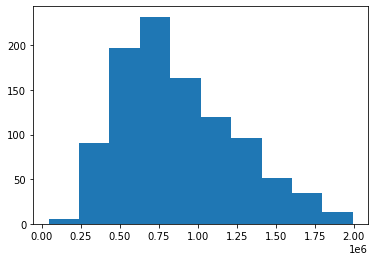

In [145]:
plt.pyplot.hist(clean_data['Sold_Price'])

In [147]:
clean_data.to_csv('clean_data.csv', index=False)

In [151]:
clean_data2 = clean_data.drop(['Name', 'link','city','coordinates'], axis=1)

In [197]:
clean_data2.to_csv('clean_data_for_analysis.csv', index=False)

In [181]:
mask = clean_data2['Lot_Size'] != '-'
clean_data2 = clean_data2[mask]

In [182]:
clean_data2['Lot_Size'] = clean_data2['Lot_Size'].astype(float)

In [178]:
stories = []
for i in clean_data2.Stories:
    if i == 'Other':
        i = '0'
    elif len(i) > 1:
        i = i[0]
    stories.append(i)
clean_data2['Stories'] = stories      

In [177]:
stories

['3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '1',
 '4',
 '3',
 '2',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '1',
 '4',
 '3',
 '2',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '2',
 '3',
 '1',
 '2',
 '3',
 '3',
 '3',
 '3',
 '2',
 '3',
 '2',
 '3',
 '3',
 '2',
 '3',
 '2',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '2',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '2',
 '3',
 '2',
 '4',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '4',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '2',
 '3',
 '2',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '4',
 '2',
 '3',
 '3',
 '4',
 '3',
 '3',
 '3',
 '4',
 '3',
 '4',
 '3',
 '3',
 '4',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '4',
 '2',
 '4',
 '3',
 '3',
 '4',
 '4',
 '2',
 '2',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '3',
 '3',
 '2',
 '2',
 '3',
 '2',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3'

In [187]:
sorte = clean_data2.sort_values(by='Tax_Value')

In [195]:
mask = clean_data2['Tax_Value'] > 100
clean_data2 = clean_data2[mask]

In [196]:
clean_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 1 to 2754
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Beds                    953 non-null    float64
 1   Baths                   953 non-null    float64
 2   SQFT                    953 non-null    float64
 3   Lot_Size                953 non-null    float64
 4   Has_Garage              953 non-null    object 
 5   New_Construction        953 non-null    object 
 6   Days_on_Market          953 non-null    object 
 7   Property_Type           953 non-null    object 
 8   Asking_Price            953 non-null    float64
 9   Sold_Price              953 non-null    int64  
 10  Difference_in_Price     953 non-null    float64
 11  Stories                 953 non-null    object 
 12  Condition               953 non-null    object 
 13  Parking_Spaces          953 non-null    int64  
 14  Central_Air             953 non-null    o